<a href="https://colab.research.google.com/github/EmmanueDavidL/Ciencia_De_Datos2025/blob/main/Clase_15_09_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Medidas de Variabilidad**

muestran como los datos se mueven al rededor del promedio

*¿Que es varianza?*

**Es una medida de dispersión que indica cuánto se alejan los datos respecto a la media
,mayor sea la varianza, más dispersos están los datos.**

*¿Que es desviacion estandar?*

**Es la raíz cuadrada de la varianza, también mide la dispersión de los datos, pero en las mismas unidades que la variable analizada pues esta estandarizada**

*¿que es la media absoluta?*

**Es el promedio de las distancias absolutas entre cada valor y la media, es decir, es el promedio de las distancias absolutas de cada dato a la media.**

**Indica cuánto se alejan los datos de la media en promedio, sin exagerar los outliners**


*¿que es la desviacion mediana de la mediana?*

**Es la mediana de las distancias absolutas entre cada dato y la mediana del conjunto.**

**La MAD indica la dispersión típica de los datos respecto a la mediana.**

**Si la MAD es baja → los datos están concentrados alrededor de la mediana.**

**Si es alta → los datos están más dispersos.**

*¿que es el rango?*

**Es la diferencia entre el valor máximo y el valor mínimo de un conjunto de datos, mide la amplitud total de los valores.**

*¿que es la estadistica ordinal?*

**Es la parte de la estadística que trabaja con datos ordinales, es decir, aquellos que pueden ordenarse o clasificarse, pero cuyas distancias entre categorías no son necesariamente iguales**

*¿que es el rango intercuatilico?*

**Es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1),Representa la dispersión del 50% central de los datos.**


In [3]:
pip install statsmodels


In [6]:
pip install wquantiles

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/state (3).csv")
data.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [14]:
mayor_poblacion=data.groupby(["Population"])["State"].max()
mayor_poblacion

,State
Population,
563626,Wyoming
625741,Vermont
672591,North Dakota
710231,Alaska
814180,South Dakota
897934,Delaware
989415,Montana
1052567,Rhode Island
1316470,New Hampshire


In [11]:
data.columns


Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [17]:
data.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [18]:
#Calcular desviacion estandar y quantiles
data["Population"].std()

6848235.347401142

In [62]:
#Extraer la desviacion estandar de la tasa de asesinatos
data["Murder.Rate"].std()

1.915736124302923

In [20]:
#Calcular el IQR
data.Population.quantile(0.75)-data.Population.quantile(0.25)

np.float64(4847308.0)

In [61]:
#Calcular el IQR del Murder Rate
data["Murder.Rate"].quantile(0.75)-data["Murder.Rate"].quantile(0.25)

np.float64(3.125)

In [23]:
#Calcular Mad de la poblacion
robust.scale.mad(data["Population"])

np.float64(3849876.1459979336)

In [63]:
#Calcular Mad de la tasa de asesinatos
robust.scale.mad(data["Murder.Rate"])

np.float64(2.3721635496089624)

In [69]:
#Como Crear data frames
data1={"Nombre"["Camilo","Kevin","Santiago"]
       "Edades":["10","15","3"]
       "Juegos":["Basketball","Tenis de mesa","Futbol"]
}
df=pd.DataFrame(data1)
df

,Nombre,Edades,Juegos
0,Camilo,10,Basketball
1,Kevin,15,Tenis de mesa
2,Santiago,3,Futbol


In [73]:
#como renombrar variables
df=df.rename(columns=["Edades":"Años","Juegos":"Deportes"])

,Nombre,Años,Deportes
0,Camilo,10,Basketball
1,Kevin,15,Tenis de mesa
2,Santiago,3,Futbol


In [105]:
data=data.rename(columns={'State':"Estados", 'Population':"Poblacion", 'Murder.Rate':"Tasa_de_Asesinatos", 'Abbreviation':"Abreviacion"})


In [106]:
data

,Estados,Poblacion,Tasas de Asesinatos,Abreviacion
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


#Exploracion de la distribucion de datos

Diagrama de Caja-resume la distribución de un conjunto de datos mostrando su mediana, cuartiles y valores extremos (outliers).

Se representa con una “caja” que va desde el primer cuartil (Q1) hasta el tercer cuartil (Q3), con una línea dentro que indica la mediana.

También incluye “bigotes” que muestran la dispersión de los datos y los posibles valores atípicos.

Diagrama de frecuencias-Es una representación gráfica que muestra cómo se distribuyen los datos en función de la frecuencia (número de veces que aparece cada valor o intervalo).

Histograma-Es un tipo especial de diagrama de frecuencias donde los datos numéricos se agrupan en intervalos (clases) y se representan con barras adyacentes.

El área de cada barra representa la frecuencia (o densidad) de los datos en ese intervalo.

Diagrama de densidad-Es una versión suavizada del histograma que estima la función de densidad de probabilidad de los datos.

Se representa como una curva continua que muestra dónde se concentran más los valores.

No cuenta las frecuencias exactas, sino que muestra la tendencia general de la distribución.

------------------------------------------****---------------

In [25]:
#Diagrama de caja

data["Murder.Rate"].quantile([0.05,0.25,0.5,0.75])

,Murder.Rate
0.05,1.600
0.25,2.425
0.50,4.000
0.75,5.550


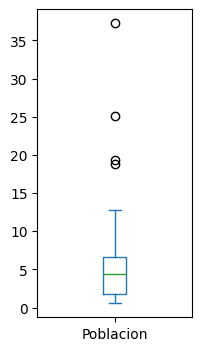

In [93]:
#Grafica de diagrama de caja
ax=(data["Murder.Rate"]/1_000_000).plot.box(figzise=(2,4))
ax.set_label("poblacion en millones")

Text(4.444444444444445, 0.5, 'Tasa de Asesinatos')

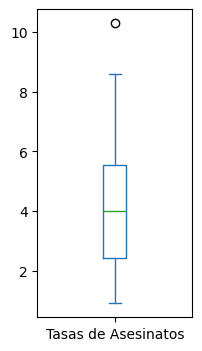

In [97]:
(data["Tasas de Asesinatos"]).plot.box(figsize=(2,4))
ax.set_ylabel("Tasa de Asesinatos")ax

In [33]:
#Calculando frecuencia y Histogramas
binnedPopulation=pd.cut(data["Population"],10)
binnedPopulation.value_counts()

,count
Population,
"(526935.67, 4232659.0]",24
"(4232659.0, 7901692.0]",14
"(7901692.0, 11570725.0]",6
"(11570725.0, 15239758.0]",2
"(15239758.0, 18908791.0]",1
"(18908791.0, 22577824.0]",1
"(22577824.0, 26246857.0]",1
"(33584923.0, 37253956.0]",1
"(26246857.0, 29915890.0]",0


In [103]:
binnedTasa_de_Asesinatos=pd.cut(data["Tasa_de_Asesinatos"],10)
binnedTasa_de_Asesinatos.value_counts()

,count
Tasas de Asesinatos,
"(1.84, 2.78]",10
"(4.66, 5.6]",9
"(5.6, 6.54]",8
"(2.78, 3.72]",8
"(3.72, 4.66]",7
"(0.891, 1.84]",5
"(6.54, 7.48]",1
"(8.42, 9.36]",1
"(9.36, 10.3]",1


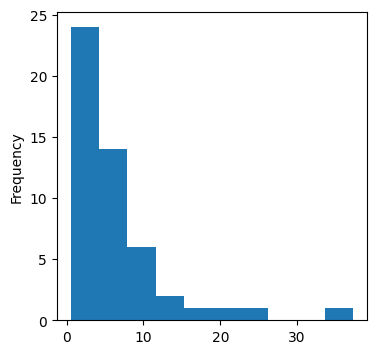

In [35]:
ax=(data.Population/1_000_000).plot.hist(figsize=(4,4))
ax.set_label("Poblacion en Millones")

Text(0, 0.5, 'Tasa de Asesinatos')

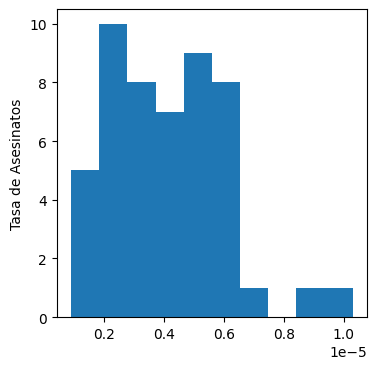

In [109]:
ax=(data["Tasas de Asesinatos"]/1_000_000).plot.hist(figsize=(4,4))
ax.set_ylabel("Tasa de Asesinatos")

Text(0.5, 0, 'Población en Millones')

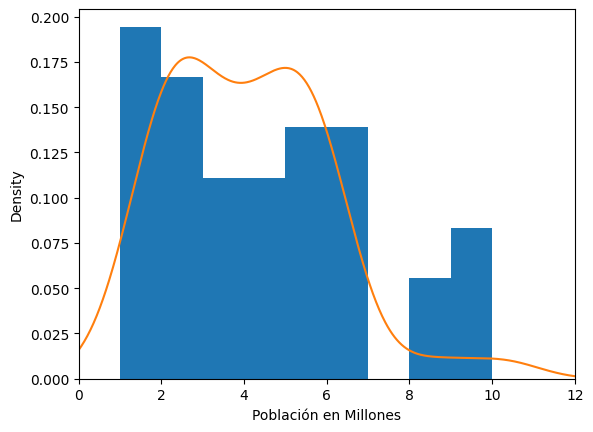

In [55]:
#Diagrama de dispersion
ax=(data.Population/1_000_000).plot.hist(density=True,xlim=(0,12),bins=range(1,12))
data["Murder.Rate"].plot.density(ax=ax)
ax.set_xlabel("Población en Millones")